# Master in Science in Data Analytics for Business - CA2

###  Data Preparation & Visualisation &  Machine Learning

**Student:** Wendy Paola Espinoza Potoy 
**ID:** 2021133

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from empiricaldist import Pmf, Cdf
from matplotlib.ticker import PercentFormatter

import warnings
warnings.filterwarnings("ignore")

# Passenger Journeys by Public Transport Dublin Ireland dataset

In [2]:
#Add the dataset to analysis data
#Add list with variables to missing values
#Define data type of the column "VALUE" as fload to avoid future issues
# Read the CSV file into a DataFrame

missing_value_formats = ["n.a.","?","NA","n/a", "na", "-"]
passenger_journeys = pd.read_csv("passenger_journey.csv" , na_values = missing_value_formats,  dtype={'VALUE': float})

In [3]:
#Check the 5 first rows of the dataset
passenger_journeys.head()

,Statistic Label,Week,Mode of Transport,UNIT,VALUE
0,Passenger Journeys,2019 Week 01,Dublin Metro Bus,Number,1987891.0
1,Passenger Journeys,2019 Week 01,"Bus, excluding Dublin Metro",Number,497598.0
2,Passenger Journeys,2019 Week 01,Rail,Number,NaN
3,Passenger Journeys,2019 Week 01,"All public transport, excluding LUAS",Number,2485489.0
4,Passenger Journeys,2019 Week 02,Dublin Metro Bus,Number,2709579.0


# Exploratory Data Analysis

In [4]:
#Check shape of the data in this case dataset has 1040 rows and 5 columns
passenger_journeys.shape

(1040, 5)

In [5]:
#Check information general of the dataset (data types, range of index, information of the columns and the memory used)
passenger_journeys.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040 entries, 0 to 1039
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Statistic Label    1040 non-null   object 
 1   Week               1040 non-null   object 
 2   Mode of Transport  1040 non-null   object 
 3   UNIT               1040 non-null   object 
 4   VALUE              976 non-null    float64
dtypes: float64(1), object(4)
memory usage: 40.8+ KB


In [6]:
#Check the measures of central tendency and measures of dispersion 
passenger_journeys.describe()

,VALUE
count,9.760000e+02
mean,1.755135e+06
std,1.435038e+06
min,2.323100e+04
25%,6.167142e+05
50%,9.525170e+05
75%,2.992955e+06
max,5.488658e+06


In [7]:
#Check the unique values of each columns in the dataset.
passenger_journeys.nunique()

Statistic Label        1
Week                 260
Mode of Transport      4
UNIT                   1
VALUE                975
dtype: int64

In [8]:
#Check the data types of the dataset to see how many differents dtypes 
#exist and if is required to transform to a different one for further analysis. 
passenger_journeys.dtypes

Statistic Label       object
Week                  object
Mode of Transport     object
UNIT                  object
VALUE                float64
dtype: object

In [9]:
#Check missing values this fucntion will check all the null values and each column and sum up them. 
#51370 missing values were detected in "VALUE" column

passenger_journeys.isnull().sum()

Statistic Label       0
Week                  0
Mode of Transport     0
UNIT                  0
VALUE                64
dtype: int64

In [10]:
#This function is used to returs the numbers of times that a value appear in a list in the dataset. 
# Counting missing values =16022 in "VALUE" column
passenger_journeys.count() 

Statistic Label      1040
Week                 1040
Mode of Transport    1040
UNIT                 1040
VALUE                 976
dtype: int64

In [11]:
#This function will show if there is any rows or colums that containing duplicate data.
duplicate_rows_df = passenger_journeys[passenger_journeys.duplicated()]
print("number of duplicate rows:", duplicate_rows_df.shape)


number of duplicate rows: (0, 5)


## Cleaning the data

Text(0.5, 1.0, 'Feature Statistics')

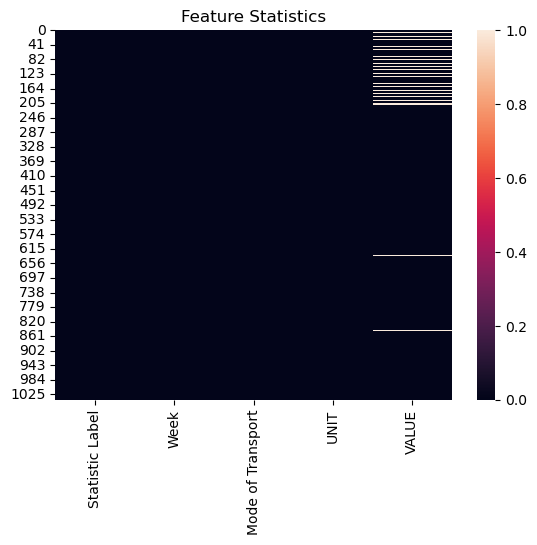

In [12]:
#This heatmap will show a visual representation of the missing value in the dataset
#It is posible to observe there is only one column with missing values = VALUE 
sns.heatmap(passenger_journeys.isnull())
plt.title("Feature Statistics")

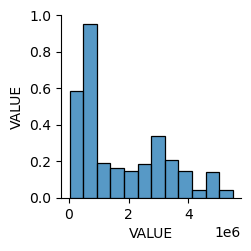

In [13]:
#Using a pairplot to check correlation
#However,there is not a good correlation between numerical variables. 
sns.pairplot(passenger_journeys)

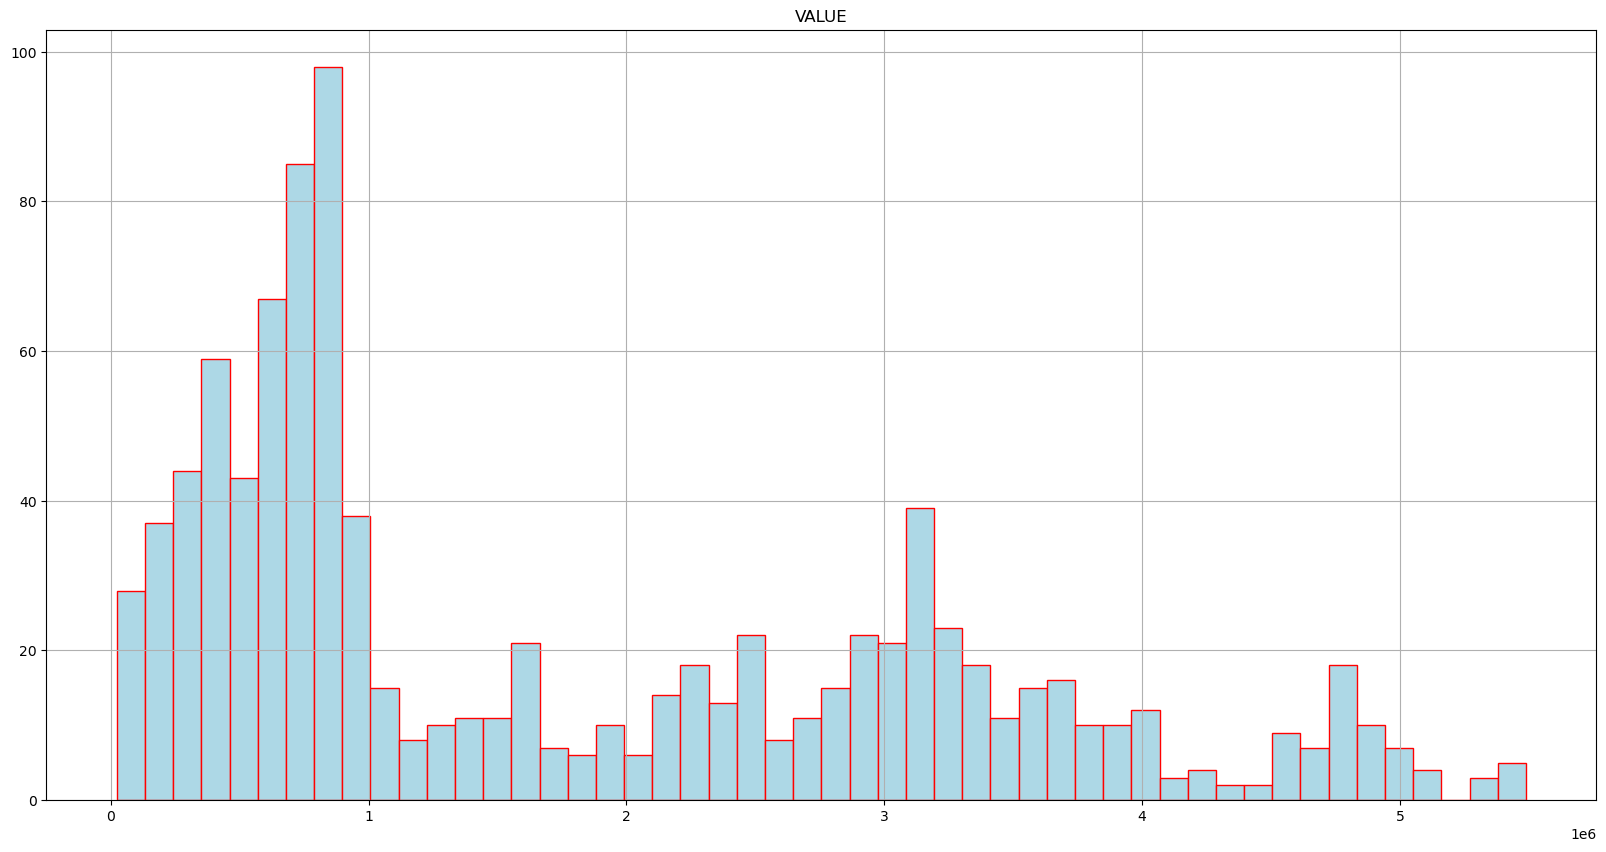

In [14]:
#plt.style.use('seaborn-whitegrid')
passenger_journeys.hist(bins=50, figsize=(20,10), color='lightblue', edgecolor = 'red')
plt.show()

# Data Preparation

In [15]:
# Extract the first 4 digits from the 'Week' column and create a new column 'Year'
passenger_journeys['Year'] = passenger_journeys['Week'].str[:4]

# Display the modified DataFrame
passenger_journeys.head()

,Statistic Label,Week,Mode of Transport,UNIT,VALUE,Year
0,Passenger Journeys,2019 Week 01,Dublin Metro Bus,Number,1987891.0,2019
1,Passenger Journeys,2019 Week 01,"Bus, excluding Dublin Metro",Number,497598.0,2019
2,Passenger Journeys,2019 Week 01,Rail,Number,NaN,2019
3,Passenger Journeys,2019 Week 01,"All public transport, excluding LUAS",Number,2485489.0,2019
4,Passenger Journeys,2019 Week 02,Dublin Metro Bus,Number,2709579.0,2019


In [16]:
# Extract the first 4 digits from the 'Week' column and create a new column 'Year'

passenger_journeys['Week'] = passenger_journeys['Week'].str[5:]


In [17]:
# Convert 'year' column to integer
passenger_journeys['Year'] = passenger_journeys['Year'].astype(int)

# Drop 'Statistic Label' and 'UNIT' columns from dataset
passenger_journeys = passenger_journeys.drop(['Statistic Label', 'UNIT'], axis=1)

# Display the modified DataFrame
passenger_journeys.head()

,Week,Mode of Transport,VALUE,Year
0,Week 01,Dublin Metro Bus,1987891.0,2019
1,Week 01,"Bus, excluding Dublin Metro",497598.0,2019
2,Week 01,Rail,NaN,2019
3,Week 01,"All public transport, excluding LUAS",2485489.0,2019
4,Week 02,Dublin Metro Bus,2709579.0,2019


# Handling Missing values 

In [18]:
passenger_journeys['VALUE'].interpolate(method='linear', direction = 'forward', inplace=True) 
print(passenger_journeys['VALUE'].head(10)) 

0    1987891.0
1     497598.0
2    1491543.5
3    2485489.0
4    2709579.0
5     633764.0
6    1988553.5
7    3343343.0
8    2784678.0
9     678097.0
Name: VALUE, dtype: float64


In [19]:
#Checking null values
passenger_journeys.isnull().sum()

Week                 0
Mode of Transport    0
VALUE                0
Year                 0
dtype: int64

In [20]:
passenger_journeys.dtypes

Week                  object
Mode of Transport     object
VALUE                float64
Year                   int32
dtype: object

In [21]:
#checking first 5 rows
passenger_journeys.head()

,Week,Mode of Transport,VALUE,Year
0,Week 01,Dublin Metro Bus,1987891.0,2019
1,Week 01,"Bus, excluding Dublin Metro",497598.0,2019
2,Week 01,Rail,1491543.5,2019
3,Week 01,"All public transport, excluding LUAS",2485489.0,2019
4,Week 02,Dublin Metro Bus,2709579.0,2019


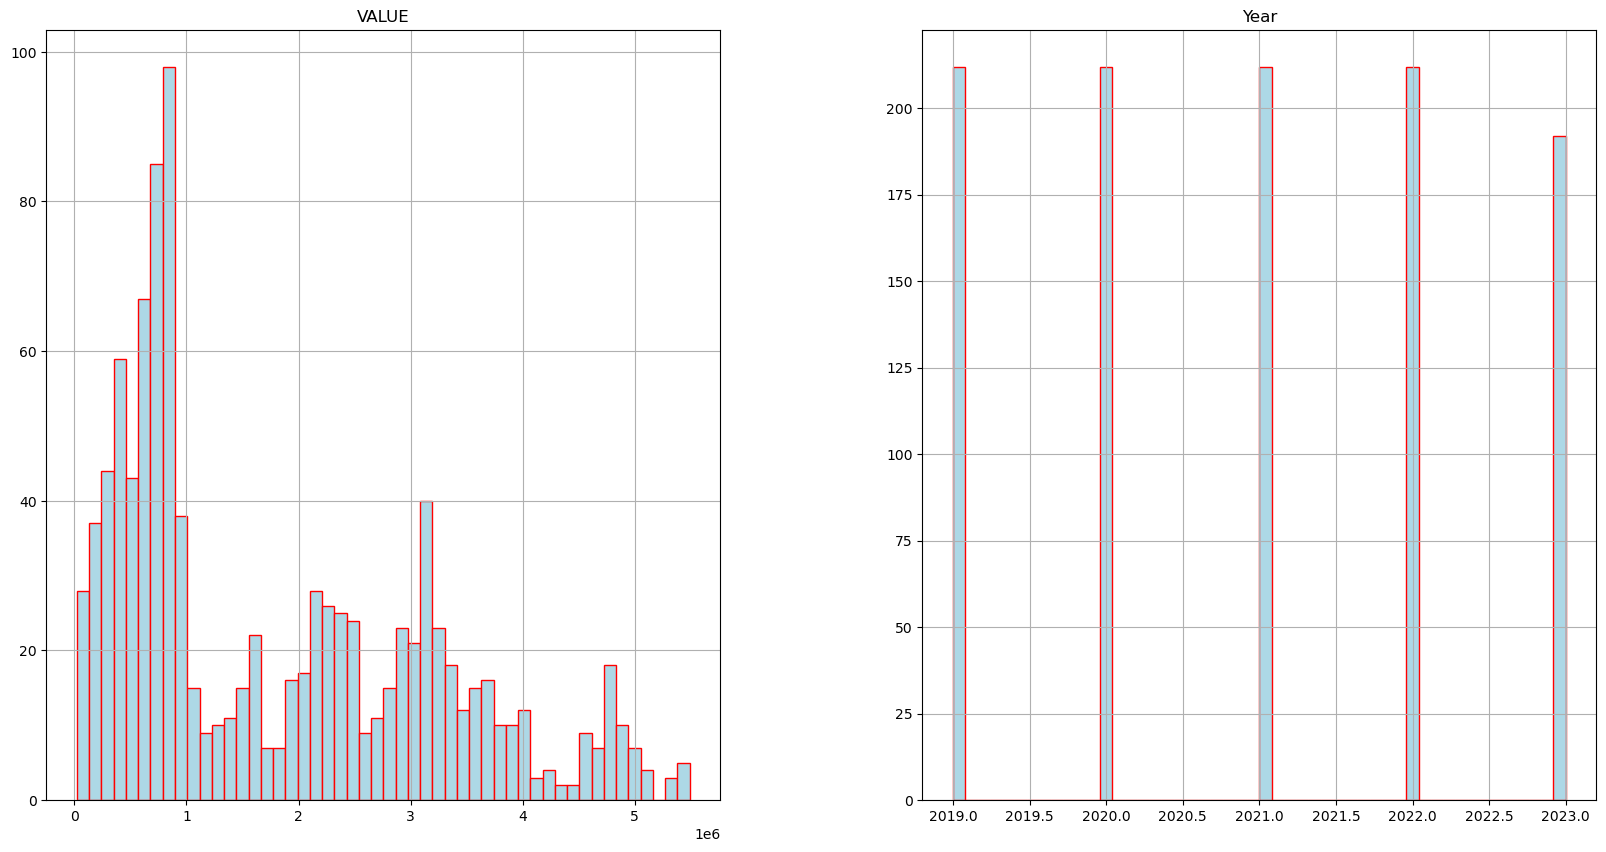

In [22]:
#plt.style.use('seaborn-whitegrid')
passenger_journeys.hist(bins=50, figsize=(20,10), color='lightblue', edgecolor = 'red')
plt.show()

# Outliers

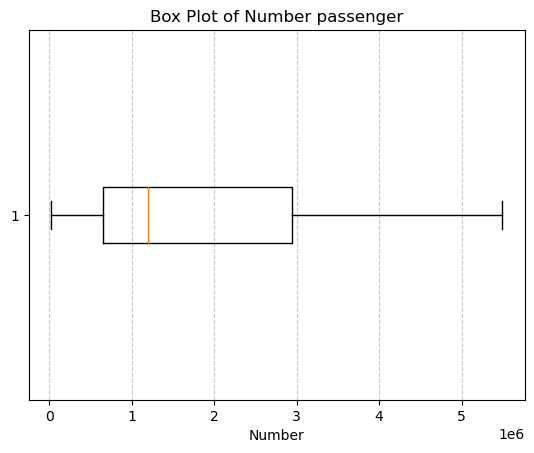

In [23]:
# No visual outliers
plt.boxplot(passenger_journeys['VALUE'], vert=False)
plt.title("Box Plot of Number passenger")
plt.xlabel("Number")
plt.grid(axis='x', linestyle='--', alpha=0.7)


# Encoding categorical variable 

In [24]:
Data_num = passenger_journeys[['Year','VALUE' ]]
Data_num

,Year,VALUE
0,2019,1987891.0
1,2019,497598.0
2,2019,1491543.5
3,2019,2485489.0
4,2019,2709579.0
...,...,...
1035,2023,5059620.0
1036,2023,3453532.0
1037,2023,941393.0
1038,2023,942218.0


In [25]:
#Creating new dataframe selection only numerical values
passenger_journeys_objects =passenger_journeys.select_dtypes(object)
print(passenger_journeys_objects)

         Week                     Mode of Transport
0     Week 01                      Dublin Metro Bus
1     Week 01           Bus, excluding Dublin Metro
2     Week 01                                  Rail
3     Week 01  All public transport, excluding LUAS
4     Week 02                      Dublin Metro Bus
...       ...                                   ...
1035  Week 47  All public transport, excluding LUAS
1036  Week 48                      Dublin Metro Bus
1037  Week 48           Bus, excluding Dublin Metro
1038  Week 48                                  Rail
1039  Week 48  All public transport, excluding LUAS

[1040 rows x 2 columns]


In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
#creating the storing of label encoding
le =LabelEncoder()

In [28]:
#creating a **for** loop to transform (hot encoding) all the values in Mortality_rate_objects at the same tome
for col in passenger_journeys_objects:
    le =LabelEncoder()
    passenger_journeys_objects[col]=le.fit_transform(passenger_journeys_objects[col])

In [29]:
#show new dataframe with encoding data
passenger_journeys_objects.head(10)

,Week,Mode of Transport
0,0,2
1,0,1
2,0,3
3,0,0
4,1,2
5,1,1
6,1,3
7,1,0
8,2,2
9,2,1


In [30]:
#create new dataframe to merge new encoding dataframes
passenger_journey = pd.merge(passenger_journeys_objects, Data_num, left_index=True, right_index=True, suffixes=("_l", "_r"))
passenger_journey.head()

,Week,Mode of Transport,Year,VALUE
0,0,2,2019,1987891.0
1,0,1,2019,497598.0
2,0,3,2019,1491543.5
3,0,0,2019,2485489.0
4,1,2,2019,2709579.0


# Data visualization

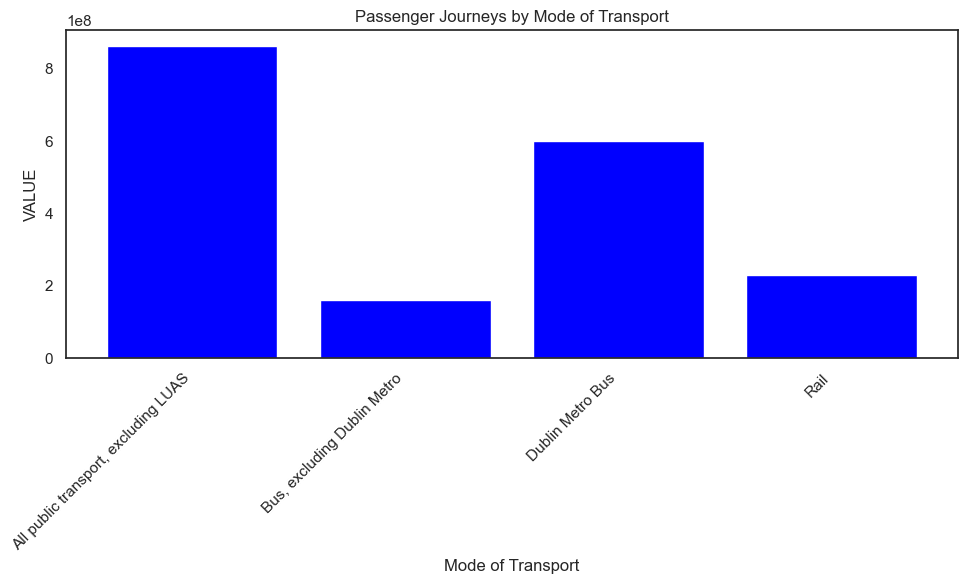

In [31]:
# Group by 'Age Range' and calculate the sum of 'VALUE_x' for each group
number_passenger_group = passenger_journeys.groupby('Mode of Transport')['VALUE'].sum().reset_index()


# Plotting
sns.set_theme(style="white", palette=None)
plt.figure(figsize=(10, 6))
plt.bar(number_passenger_group['Mode of Transport'], number_passenger_group['VALUE'], color='blue')
plt.xlabel('Mode of Transport')
plt.ylabel('VALUE')
plt.title('Passenger Journeys by Mode of Transport')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

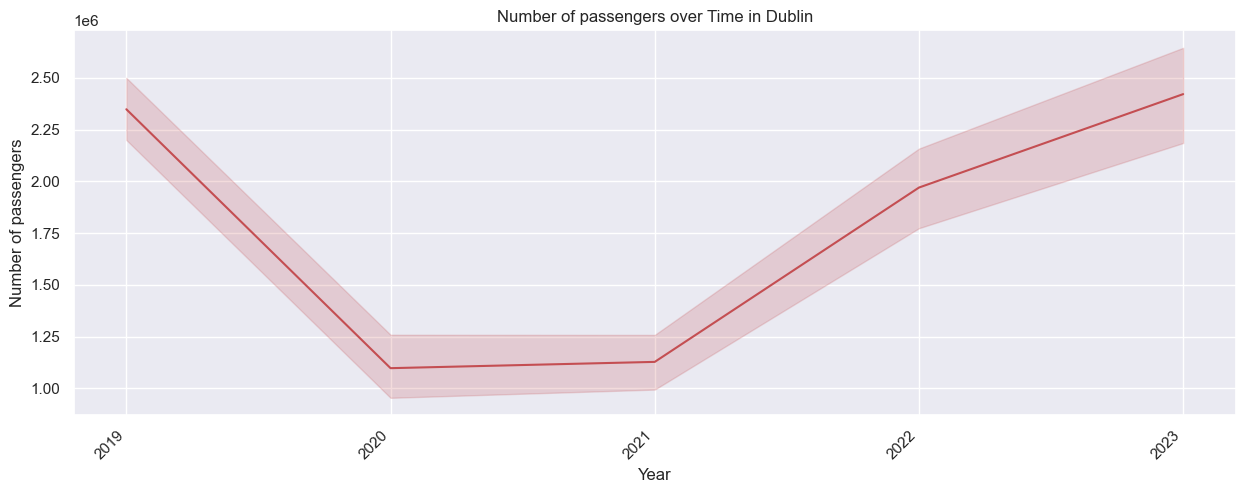

In [32]:
# Plotting a line plot to visualize Rate values over time
sns.set_theme()
plt.figure(figsize=(15, 5))
sns.lineplot(data=passenger_journeys, x="Year", y="VALUE", color="r")
plt.title("Number of passengers over Time in Dublin")
plt.xlabel("Year")
plt.ylabel("Number of passengers")
plt.grid(True)

# Force x-axis ticks to display as integers
plt.xticks(passenger_journeys['Year'].unique(), rotation=45, ha='right')  # Assuming 'Year' is the correct column name

# Show the plot
plt.show()

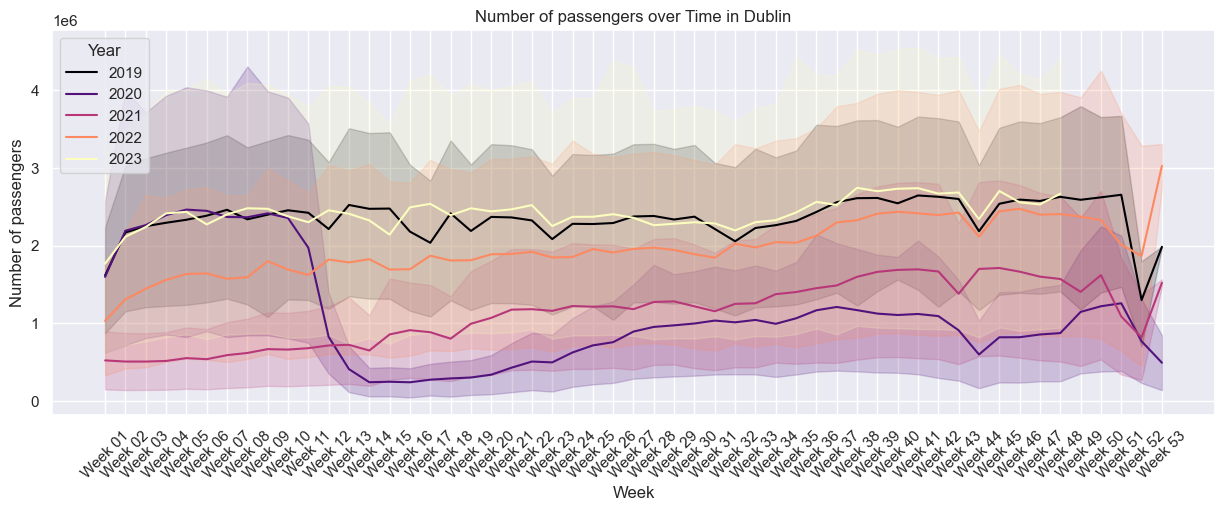

In [33]:
# Plotting a line plot to visualize Rate values over time
plt.figure(figsize=(15, 5))
sns.lineplot(data=passenger_journeys, x="Week", y="VALUE", hue="Year", palette="magma")  # Change "viridis" to your desired color palette

plt.title("Number of passengers over Time in Dublin")
plt.xlabel("Week")
plt.ylabel("Number of passengers")
plt.xticks(rotation=45)

# Show the plot
plt.show()


## Unsupervised modelling

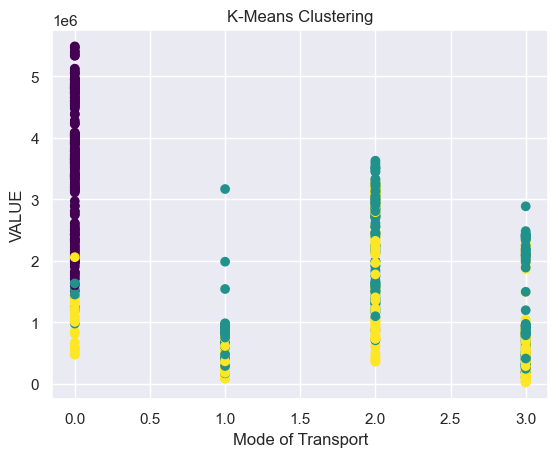

In [34]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Assuming 'df' is your DataFrame
X = passenger_journey[['Week', 'Mode of Transport', 'Year', 'VALUE']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
passenger_journey['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize K-Means Clusters
plt.scatter(passenger_journey['Mode of Transport'], passenger_journey['VALUE'], c=passenger_journey['Cluster'], cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Mode of Transport')
plt.ylabel('VALUE')
plt.show()


In [35]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X_scaled,  passenger_journey['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.24188120424380063


In [36]:
kmeans_inertia = kmeans.inertia_
print(f"K-Means Inertia: {kmeans_inertia}")

K-Means Inertia: 2489.2229803436408


## Supervise Modelling 

In [37]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [38]:
# Declaration of Variables
X = passenger_journey[['Week', 'Mode of Transport', 'Year']]
y = passenger_journey['VALUE']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Lineal Regression model 
linear_regressor = LinearRegression()
lasso_regressor = Lasso(alpha=0.1)
ridge_regressor = Ridge(alpha=1.0)

#Non-lineal Regression model 
rf_regressor = RandomForestRegressor(random_state=42)
svr_regressor = SVR()
knn_regressor = KNeighborsRegressor()
gb_regressor = GradientBoostingRegressor()

# List of models for iteration
#models = [linear_regressor, lasso_regressor, ridge_regressor, rf_regressor, svr_regressor, knn_regressor, gb_regressor]

Lineal_Regression_models = [linear_regressor, lasso_regressor, ridge_regressor] 
Non_Lineal_Regression_models=[rf_regressor, svr_regressor, knn_regressor, gb_regressor]

# Lineal Regression models
for model in Lineal_Regression_models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'Lineal Regression Model: {type(model).__name__}')
    print(f'Mean Squared Error: {mse}')
    print(f"R-squared (R2) Score: {r2}")
    print('\n')

# Non-Lineal Regression models
for model in Non_Lineal_Regression_models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'Non-Lineal Regression Model: {type(model).__name__}')
    print(f'Mean Squared Error: {mse}')
    print(f"R-squared (R2) Score: {r2}")
    print('\n')


Lineal Regression Model: LinearRegression
Mean Squared Error: 1524552547765.8096
R-squared (R2) Score: 0.22772773109581956


Lineal Regression Model: Lasso
Mean Squared Error: 1524552541248.371
R-squared (R2) Score: 0.22772773439727145


Lineal Regression Model: Ridge
Mean Squared Error: 1524592605763.5159
R-squared (R2) Score: 0.22770743944970884


Non-Lineal Regression Model: RandomForestRegressor
Mean Squared Error: 33014281565.152897
R-squared (R2) Score: 0.9832763953148576


Non-Lineal Regression Model: SVR
Mean Squared Error: 2217770308285.505
R-squared (R2) Score: -0.12342635247169365


Non-Lineal Regression Model: KNeighborsRegressor
Mean Squared Error: 1085030266393.2596
R-squared (R2) Score: 0.45037067637635275


Non-Lineal Regression Model: GradientBoostingRegressor
Mean Squared Error: 114729231076.76157
R-squared (R2) Score: 0.9418831422222036




In [39]:
from tabulate import tabulate

# Initialize variables to store results
results_table = []

# Lineal Regression models
for model in Lineal_Regression_models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results_table.append([type(model).__name__, mse, r2, 'Lineal'])

# Non-Lineal Regression models
for model in Non_Lineal_Regression_models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results_table.append([type(model).__name__, mse, r2, 'Non-Lineal'])

# Print the table
headers = ["Model", "Mean Squared Error", "R-squared (R2) Score", "Type of model"]
print(tabulate(results_table, headers=headers, tablefmt="grid"))


+---------------------------+----------------------+------------------------+-----------------+
| Model                     |   Mean Squared Error |   R-squared (R2) Score | Type of model   |
+===========================+======================+========================+=================+
| LinearRegression          |          1.52455e+12 |               0.227728 | Lineal          |
+---------------------------+----------------------+------------------------+-----------------+
| Lasso                     |          1.52455e+12 |               0.227728 | Lineal          |
+---------------------------+----------------------+------------------------+-----------------+
| Ridge                     |          1.52459e+12 |               0.227707 | Lineal          |
+---------------------------+----------------------+------------------------+-----------------+
| RandomForestRegressor     |          3.30143e+10 |               0.983276 | Non-Lineal      |
+---------------------------+-----------

In [40]:
models = [linear_regressor, lasso_regressor, ridge_regressor, rf_regressor, svr_regressor, knn_regressor, gb_regressor]

# Initialize variables to store the top three models
top_models_mse = [(None, float('inf'))] * 3  # List of (model, mse)
top_models_r2 = [(None, -float('inf'))] * 3  # List of (model, r2)

# Iterate through models and evaluate
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Update top models based on MSE
    top_models_mse.append((model, mse))
    top_models_mse.sort(key=lambda x: x[1])  # Sort by MSE and keep top 3
    top_models_mse = top_models_mse[:2]

    # Update top models based on R2 score
    top_models_r2.append((model, r2))
    top_models_r2.sort(key=lambda x: x[1], reverse=True)  # Sort by R2 score and keep top 3
    top_models_r2 = top_models_r2[:2]

# Print the top three models based on MSE
print('\nTop 2 Best Models based on Mean Squared Error:')
for i, (model, mse) in enumerate(top_models_mse, 1):
    print(f'{i}. Model: {type(model).__name__}, MSE: {mse}')

# Print the top three models based on R2 score
print('\nTop 2 Best Models based on R-squared (R2) Score:')
for i, (model, r2) in enumerate(top_models_r2, 1):
    print(f'{i}. Model: {type(model).__name__}, R2 Score: {r2}')



Top 2 Best Models based on Mean Squared Error:
1. Model: RandomForestRegressor, MSE: 33014281565.152897
2. Model: GradientBoostingRegressor, MSE: 114729231076.76157

Top 2 Best Models based on R-squared (R2) Score:
1. Model: RandomForestRegressor, R2 Score: 0.9832763953148576
2. Model: GradientBoostingRegressor, R2 Score: 0.9418831422222036


## Model 1: Random Forest Regressor

Generation Random forest regression model and selecting hyperparameters using GridSearchCV 

In [41]:
#Declaracion de variables
X = passenger_journey[['Week', 'Mode of Transport', 'Year']]
y = passenger_journey['VALUE']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42, max_depth= 10, min_samples_leaf = 1, n_estimators= 200)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

# Create GridSearchCV object
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_


print(f'Best Parameters: {best_params}')
print(f'Mean Squared Error (Random Forest): {mse_rf}')
print(f"R-squared (R2) Score (Random Forest): {r2_rf}")


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'n_estimators': 200}
Mean Squared Error (Random Forest): 35274608566.50512
R-squared (R2) Score (Random Forest): 0.9821314115854625


Mean Squared Error (MSE):

The MSE is a measure of the average squared difference between the predicted and actual values.
In your case, the MSE is relatively low (33,014,281,565.15), indicating that the Random Forest model's predictions are close to the actual values on average.
R-squared (R2) Score:

The R2 score represents the proportion of the variance in the target variable that is explained by the model.
A high R2 score (0.983) is excellent. It indicates that the Random Forest model explains about 98.3% of the variance in your data, suggesting a strong fit to the underlying patterns.

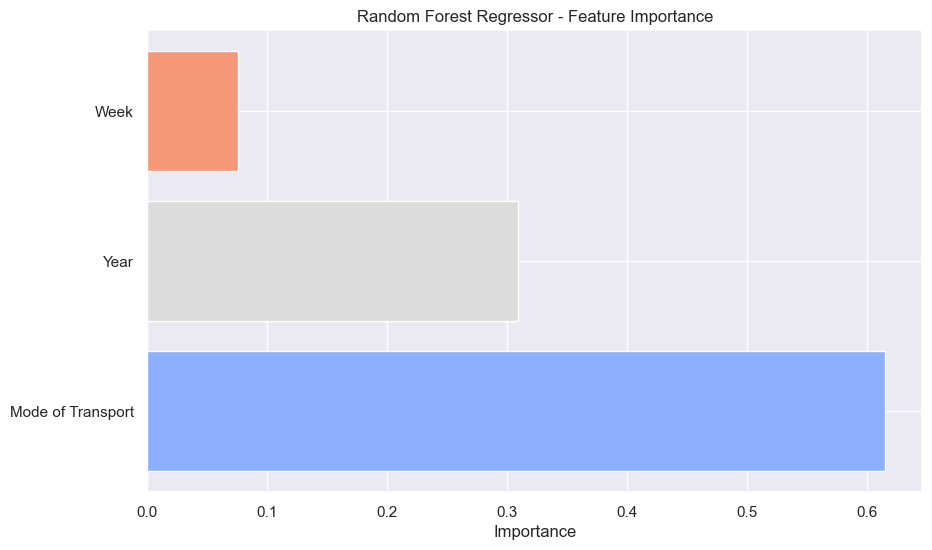

In [42]:
# Features importance

# Fit the model to the entire dataset
rf_model.fit(X, y)

# Extract feature importances
feature_importance = rf_model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Create a custom color palette
colors_gb = sns.color_palette('coolwarm', n_colors=len(feature_importance_df))

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color=colors_gb) 
plt.xlabel('Importance')
plt.title('Random Forest Regressor - Feature Importance')
plt.show()


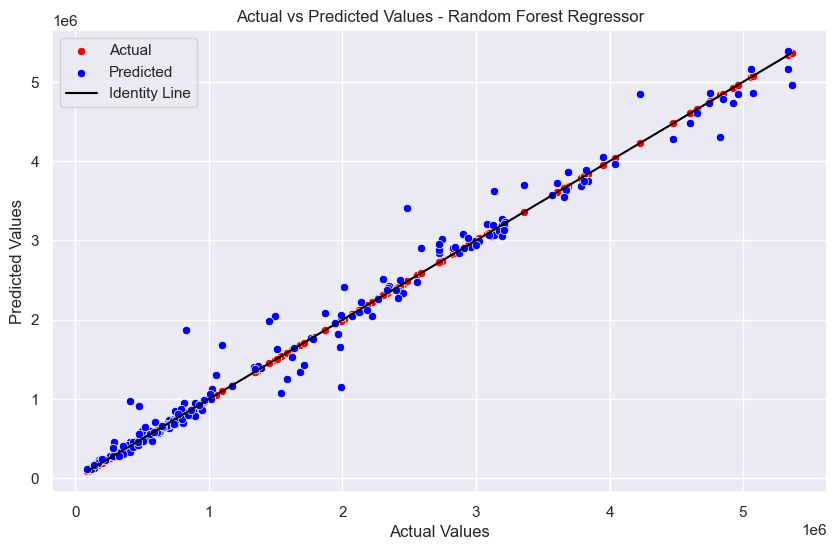

In [43]:
# Create a DataFrame to store actual and predicted values
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf})

# Scatter plot with different colors for actual and predicted values
plt.figure(figsize=(10, 6))

# Plot actual values in red
sns.scatterplot(x='Actual', y='Actual', data=results_df, color='red', label='Actual')

# Plot predicted values in blue
sns.scatterplot(x='Actual', y='Predicted', data=results_df, color='blue', label='Predicted')

# Add a line representing the identity line
plt.plot([results_df['Actual'].min(), results_df['Actual'].max()],
         [results_df['Actual'].min(), results_df['Actual'].max()],
         linestyle='-', color='black', label='Identity Line')

plt.title('Actual vs Predicted Values - Random Forest Regressor')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()




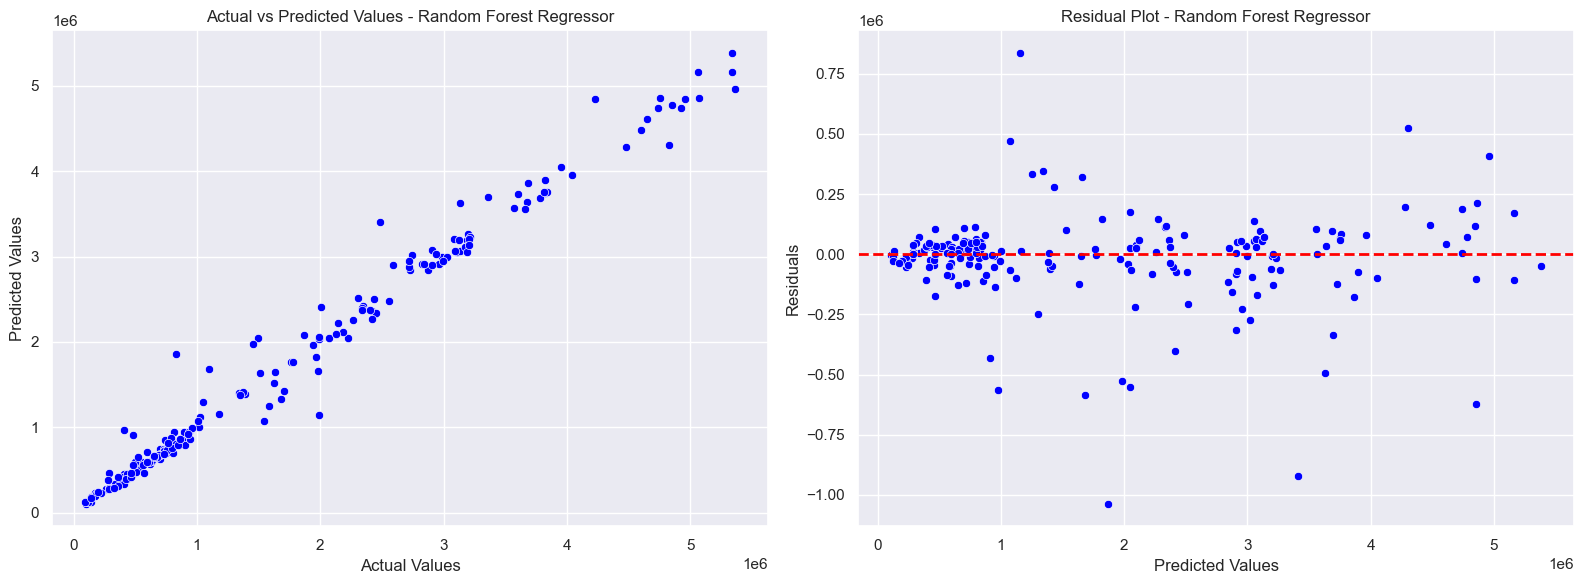

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot and Residual plot in a single plot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Scatter plot of actual vs predicted values
sns.scatterplot(x=y_test, y=y_pred_rf, color='blue', ax=axes[0])
axes[0].set_title('Actual vs Predicted Values - Random Forest Regressor')
axes[0].set_xlabel('Actual Values')
axes[0].set_ylabel('Predicted Values')
axes[0].grid(True)

# Residual plot
sns.scatterplot(x=y_pred_rf, y=y_test - y_pred_rf, color='blue', ax=axes[1])
axes[1].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[1].set_title('Residual Plot - Random Forest Regressor')
axes[1].set_xlabel('Predicted Values')
axes[1].set_ylabel('Residuals')
axes[1].grid(True)

plt.tight_layout()
plt.show()

## Model 2: GradientBoostingRegressor

In [45]:
from sklearn.ensemble import GradientBoostingRegressor

In [46]:
# Assuming 'X' is your feature matrix and 'y' is your target variable
X = passenger_journey[['Week', 'Mode of Transport', 'Year']]
y = passenger_journey['VALUE']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor()

# Define the hyperparameters and their possible values for GridSearch
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2, 0.5],
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [3, 4, 5, 6]
}

# Create GridSearchCV object
grid_search = GridSearchCV(gb_regressor, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_

# Initialize the Gradient Boosting Regressor with the best hyperparameters
gb_regressor_best = GradientBoostingRegressor(learning_rate=best_params['learning_rate'],
                                              n_estimators=best_params['n_estimators'],
                                              max_depth=best_params['max_depth'])

# Fit the model to the training data
gb_regressor_best.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gb = gb_regressor_best.predict(X_test)

# Evaluate the model
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f'Best Parameters: {best_params}')
print(f'Mean Squared Error (Gradient Boosting Regressor): {mse_gb}')
print(f"R-squared (R2) Score (Gradient Boosting Regressor): {r2_gb}")



Best Parameters: {'learning_rate': 0.5, 'max_depth': 4, 'n_estimators': 200}
Mean Squared Error (Gradient Boosting Regressor): 42350581567.13166
R-squared (R2) Score (Gradient Boosting Regressor): 0.9785470302324506


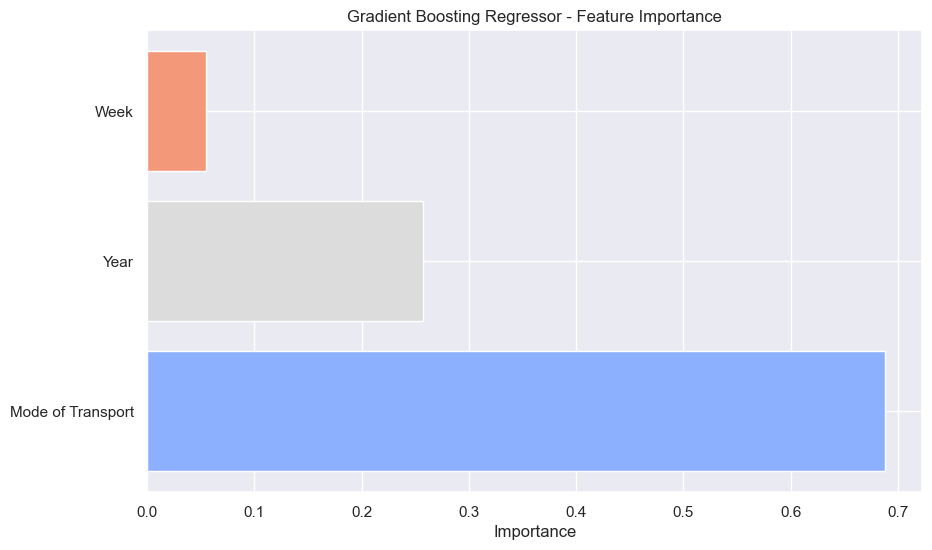

In [47]:
# Initialize the Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor()

# Fit the model to your data
gb_regressor.fit(X, y)

# Extract feature importances
feature_importance_gb = gb_regressor.feature_importances_

# Create a DataFrame to store feature importances
feature_importance_df_gb = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance_gb})

# Sort the DataFrame by importance in descending order
feature_importance_df_gb = feature_importance_df_gb.sort_values(by='Importance', ascending=False)

# Create a custom color palette
colors_gb = sns.color_palette('coolwarm', n_colors=len(feature_importance_df_gb))

# Plot feature importances with mixed colors
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df_gb['Feature'], feature_importance_df_gb['Importance'], color=colors_gb)

plt.xlabel('Importance')
plt.title('Gradient Boosting Regressor - Feature Importance')
plt.show()


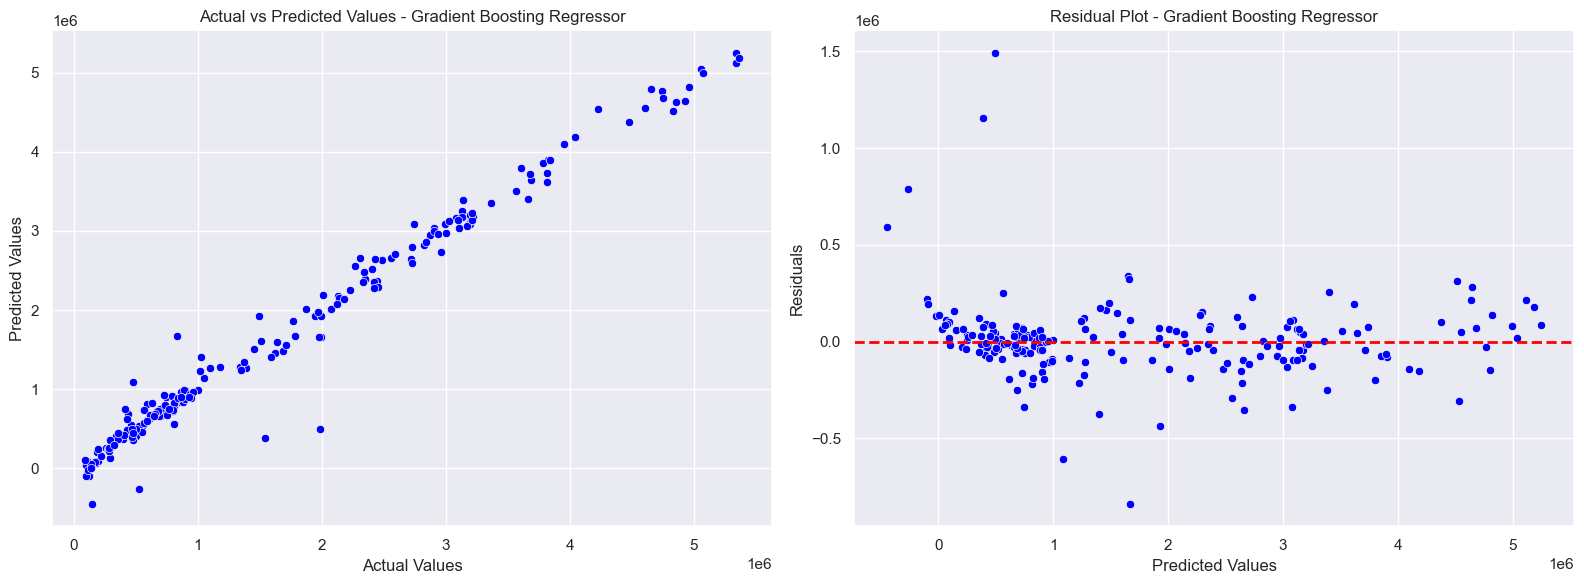

In [48]:


# Scatter plot and Residual plot in a single plot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Scatter plot of actual vs predicted values
sns.scatterplot(x=y_test, y=y_pred_gb, color='blue', ax=axes[0])
axes[0].set_title('Actual vs Predicted Values - Gradient Boosting Regressor')
axes[0].set_xlabel('Actual Values')
axes[0].set_ylabel('Predicted Values')
axes[0].grid(True)

# Residual plot
sns.scatterplot(x=y_pred_gb, y=y_test - y_pred_gb, color='blue', ax=axes[1])
axes[1].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[1].set_title('Residual Plot - Gradient Boosting Regressor')
axes[1].set_xlabel('Predicted Values')
axes[1].set_ylabel('Residuals')
axes[1].grid(True)

plt.tight_layout()
plt.show()

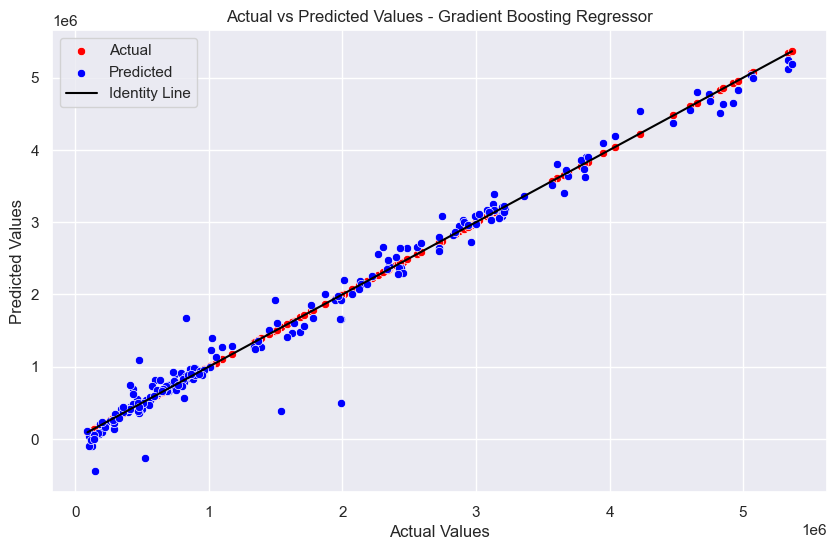

In [49]:
# Create a DataFrame to store actual and predicted values
results_df_gb = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_gb})

# Scatter plot with different colors for actual and predicted values
plt.figure(figsize=(10, 6))

# Plot actual values in red
sns.scatterplot(x='Actual', y='Actual', data=results_df_gb, color='red', label='Actual')

# Plot predicted values in blue
sns.scatterplot(x='Actual', y='Predicted', data=results_df_gb, color='blue', label='Predicted')

# Add a line representing the identity line
plt.plot([results_df_gb['Actual'].min(), results_df_gb['Actual'].max()],
         [results_df_gb['Actual'].min(), results_df_gb['Actual'].max()],
         linestyle='-', color='black', label='Identity Line')

plt.title('Actual vs Predicted Values - Gradient Boosting Regressor')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()


# Public Transport Journeys by Type of Transport London UK

In [50]:
#Add the dataset to analysis data
#Add list with variables to missing values
#Define data type of the column "VALUE" as fload to avoid future issues
# Read the CSV file into a DataFrame

missing_value_formats = ["n.a.","?","NA","n/a", "na", "-"]
Type_of_Transport_london = pd.read_csv("tfl_journeys_type_london.csv" , na_values = missing_value_formats,  dtype={'VALUE': float})

In [51]:
Type_of_Transport_london.head()

,Period and Financial year,Reporting Period,Days in period,Period beginning,Period ending,Bus journeys (m),Underground journeys (m),DLR Journeys (m),Tram Journeys (m),Overground Journeys (m),London Cable Car Journeys (m),TfL Rail Journeys (m)
0,01_10/11,1,31,01-Apr-10,01-May-10,189.1,90.5,6.3,2.3,NaN,NaN,NaN
1,02_10/11,2,28,02-May-10,29-May-10,181.6,84.5,5.8,2.2,NaN,NaN,NaN
2,03_10/11,3,28,30-May-10,26-Jun-10,175.9,84.3,5.8,2.1,NaN,NaN,NaN
3,04_10/11,4,28,27-Jun-10,24-Jul-10,183.4,86.5,6.1,2.1,NaN,NaN,NaN
4,05_10/11,5,28,25-Jul-10,21-Aug-10,160.4,82.9,5.8,2.0,NaN,NaN,NaN


# Exploratory Data Analysis

In [52]:
#Check the 5 first rows of the dataset
Type_of_Transport_london.shape

(177, 12)

In [53]:
Type_of_Transport_london.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Period and Financial year      177 non-null    object 
 1   Reporting Period               177 non-null    int64  
 2   Days in period                 177 non-null    int64  
 3   Period beginning               177 non-null    object 
 4   Period ending                  177 non-null    object 
 5   Bus journeys (m)               177 non-null    float64
 6   Underground journeys (m)       177 non-null    float64
 7   DLR Journeys (m)               177 non-null    float64
 8   Tram Journeys (m)              177 non-null    float64
 9   Overground Journeys (m)        170 non-null    float64
 10  London Cable Car Journeys (m)  148 non-null    float64
 11  TfL Rail Journeys (m)          111 non-null    float64
dtypes: float64(7), int64(2), object(3)
memory usage: 1

In [54]:
Type_of_Transport_london.describe()

,Reporting Period,Days in period,Bus journeys (m),Underground journeys (m),DLR Journeys (m),Tram Journeys (m),Overground Journeys (m),London Cable Car Journeys (m),TfL Rail Journeys (m)
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,170.000000,148.000000,111.000000
mean,6.887006,28.084746,159.251412,88.789831,7.600000,1.993220,11.365294,0.110135,5.185586
std,3.735381,0.655955,35.217372,24.040373,1.890076,0.460557,3.491889,0.059178,4.074128
min,1.000000,26.000000,30.200000,5.700000,1.200000,0.400000,1.000000,0.000000,0.600000
25%,4.000000,28.000000,145.100000,84.500000,6.500000,1.700000,8.925000,0.100000,3.250000
50%,7.000000,28.000000,173.700000,94.100000,7.700000,2.200000,11.600000,0.100000,3.800000
75%,10.000000,28.000000,182.500000,105.300000,9.200000,2.300000,14.375000,0.100000,4.600000
max,13.000000,31.000000,207.500000,118.200000,10.600000,2.800000,17.800000,0.500000,17.800000


In [55]:
Type_of_Transport_london.nunique()

Period and Financial year        164
Reporting Period                  13
Days in period                     6
Period beginning                 177
Period ending                    177
Bus journeys (m)                 154
Underground journeys (m)         158
DLR Journeys (m)                  65
Tram Journeys (m)                 22
Overground Journeys (m)           87
London Cable Car Journeys (m)      5
TfL Rail Journeys (m)             56
dtype: int64

In [56]:
Type_of_Transport_london.isnull().sum()

Period and Financial year         0
Reporting Period                  0
Days in period                    0
Period beginning                  0
Period ending                     0
Bus journeys (m)                  0
Underground journeys (m)          0
DLR Journeys (m)                  0
Tram Journeys (m)                 0
Overground Journeys (m)           7
London Cable Car Journeys (m)    29
TfL Rail Journeys (m)            66
dtype: int64

In [57]:
Type_of_Transport_london.count()

Period and Financial year        177
Reporting Period                 177
Days in period                   177
Period beginning                 177
Period ending                    177
Bus journeys (m)                 177
Underground journeys (m)         177
DLR Journeys (m)                 177
Tram Journeys (m)                177
Overground Journeys (m)          170
London Cable Car Journeys (m)    148
TfL Rail Journeys (m)            111
dtype: int64

In [58]:
#This function will show if there is any rows or colums that containing duplicate data.
# This function will show if there are any rows or columns containing duplicate data.
duplicate_rows_df = Type_of_Transport_london[Type_of_Transport_london.duplicated()]
print("Number of duplicate rows:", duplicate_rows_df.shape[0])  # Use duplicate_rows_df.shape[0] to get the number of rows

Number of duplicate rows: 0


In [59]:
#sns.pairplot(Type_of_Transport_london, diag_kind="kde")
#plt.show()

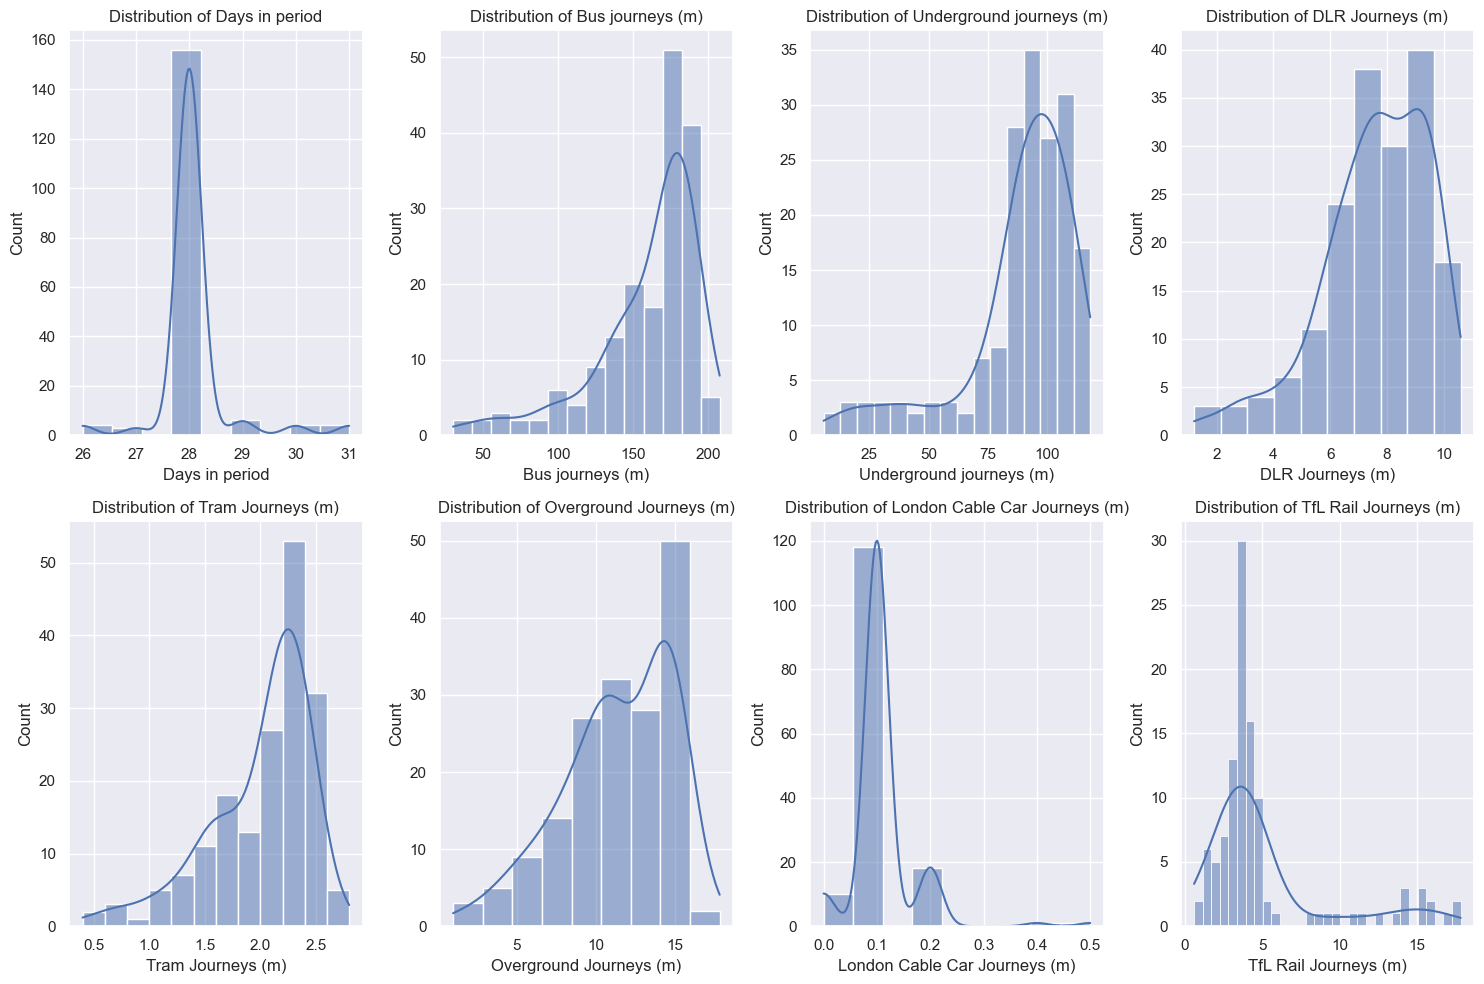

In [60]:
# Select specific columns for distribution plots
selected_columns = [ 'Days in period', 'Bus journeys (m)', 
                     'Underground journeys (m)', 'DLR Journeys (m)',
                     'Tram Journeys (m)', 'Overground Journeys (m)',
                     'London Cable Car Journeys (m)', 'TfL Rail Journeys (m)']
# Set up subplots with two rows
fig, axes = plt.subplots(nrows=2, ncols=len(selected_columns) // 2 , figsize=(15, 10))

# Flatten the 2D array of subplots
axes = axes.flatten()

# Create distribution plots for each selected column
for i, column in enumerate(selected_columns):
    sns.histplot(Type_of_Transport_london[column], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

# Data Preparation

In [61]:
# Drop 'Statistic Label' and 'UNIT' columns from dataset
Type_of_Transport_london = Type_of_Transport_london.drop(['Period and Financial year'], axis=1)

# Convert 'Period beginning' and 'Period ending' columns to datetime
Type_of_Transport_london['Period beginning'] = pd.to_datetime(Type_of_Transport_london['Period beginning'])
Type_of_Transport_london['Period ending'] = pd.to_datetime(Type_of_Transport_london['Period ending'])

# Extract the year and create a new column
Type_of_Transport_london['Year'] = Type_of_Transport_london['Period ending'].dt.year
Type_of_Transport_london['Year'] = Type_of_Transport_london['Year'].astype(str).str[:4]

# Select data only for the years 2019, 2020, 2021, 2022, and 2023
selected_years = [2019, 2020, 2021, 2022, 2023]
Type_of_Transport_london = Type_of_Transport_london[
    (Type_of_Transport_london['Period beginning'].dt.year.isin(selected_years)) |
    (Type_of_Transport_london['Period ending'].dt.year.isin(selected_years))
]

# Print the filtered DataFrame
Type_of_Transport_london.head()

,Reporting Period,Days in period,Period beginning,Period ending,Bus journeys (m),Underground journeys (m),DLR Journeys (m),Tram Journeys (m),Overground Journeys (m),London Cable Car Journeys (m),TfL Rail Journeys (m),Year
113,10,28,2018-12-09,2019-01-05,144.9,91.9,7.5,1.9,11.6,0.1,3.9,2019
114,11,28,2019-01-06,2019-02-02,171.3,106.7,9.3,2.2,14.5,0.1,4.6,2019
115,12,28,2019-02-03,2019-03-02,171.3,110.8,9.7,2.2,14.4,0.1,4.4,2019
116,13,29,2019-03-03,2019-03-31,182.7,114.1,10.0,2.2,15.7,0.1,4.3,2019
117,1,28,2019-04-01,2019-04-27,156.6,101.2,8.9,2.0,13.9,0.1,4.3,2019


In [62]:
Type_of_Transport_london_melt = Type_of_Transport_london.melt(
    id_vars=["Year", "Reporting Period", "Days in period", "Period beginning", "Period ending"],
    var_name="Mode of Transport",
    value_name="Value_in_millions"
)

Type_of_Transport_london_melt.head(10)

,Year,Reporting Period,Days in period,Period beginning,Period ending,Mode of Transport,Value_in_millions
0,2019,10,28,2018-12-09,2019-01-05,Bus journeys (m),144.9
1,2019,11,28,2019-01-06,2019-02-02,Bus journeys (m),171.3
2,2019,12,28,2019-02-03,2019-03-02,Bus journeys (m),171.3
3,2019,13,29,2019-03-03,2019-03-31,Bus journeys (m),182.7
4,2019,1,28,2019-04-01,2019-04-27,Bus journeys (m),156.6
5,2019,2,28,2019-04-28,2019-05-25,Bus journeys (m),175.2
6,2019,3,28,2019-05-26,2019-06-22,Bus journeys (m),171.4
7,2019,4,28,2019-06-23,2019-07-20,Bus journeys (m),177.0
8,2019,5,28,2019-07-21,2019-08-17,Bus journeys (m),149.8
9,2019,6,28,2019-08-18,2019-09-14,Bus journeys (m),159.8


In [63]:
Type_of_Transport_london_melt.shape

(448, 7)

## Handling Missing values and cleaning data 

Text(0.5, 1.0, 'Feature Statistics')

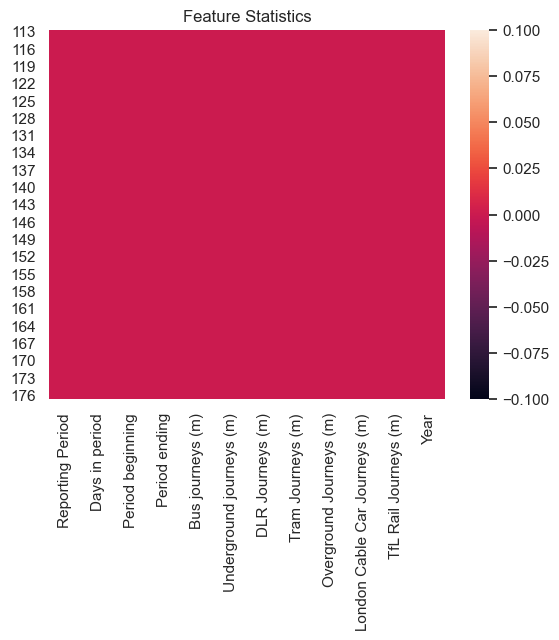

In [64]:
#This heatmap will show a visual representation of the missing value in the dataset
#It is posible to observe there is only one column with missing values = VALUE 
sns.heatmap(Type_of_Transport_london.isnull())
plt.title("Feature Statistics")

In [65]:
#Checking null values
Type_of_Transport_london.isnull().sum()

Reporting Period                 0
Days in period                   0
Period beginning                 0
Period ending                    0
Bus journeys (m)                 0
Underground journeys (m)         0
DLR Journeys (m)                 0
Tram Journeys (m)                0
Overground Journeys (m)          0
London Cable Car Journeys (m)    0
TfL Rail Journeys (m)            0
Year                             0
dtype: int64

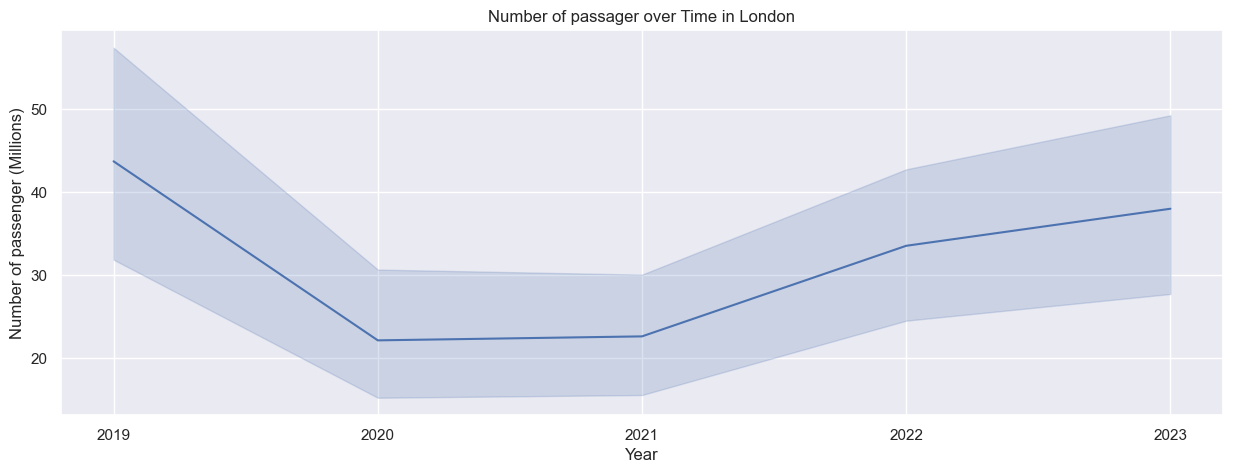

In [66]:
#Plotting a line plot to visualised number of passenger (values) over the year

plt.figure(figsize=(15, 5))
sns.lineplot(data=Type_of_Transport_london_melt, x="Year", y="Value_in_millions", color="b")
plt.title("Number of passager over Time in London")
plt.xlabel("Year")
plt.ylabel("Number of passenger (Millions)")
plt.grid(True)

# Show the plot
plt.show()

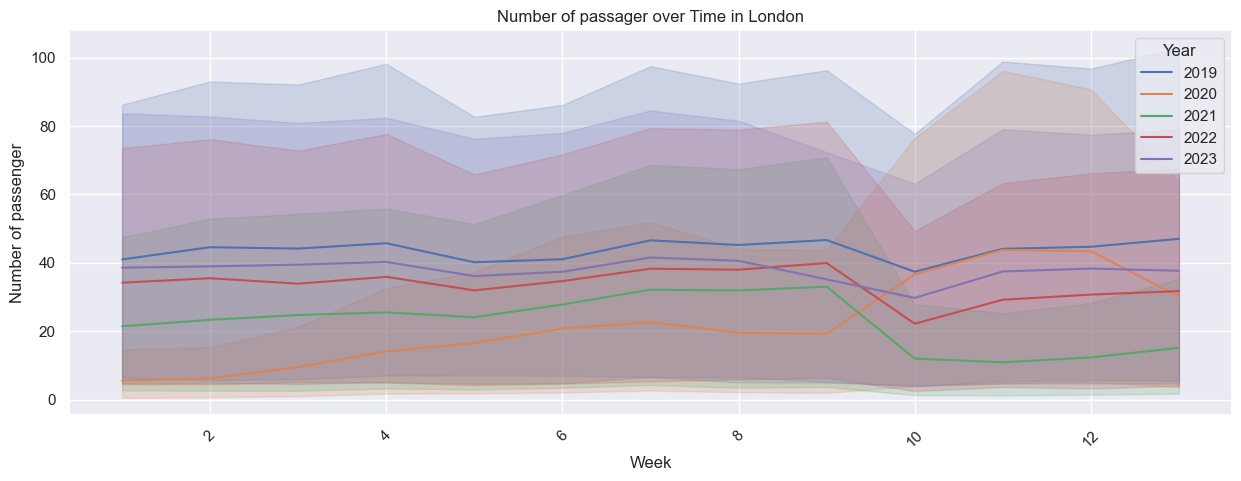

In [67]:
#Plotting a line plot to visualised Rate values over the time
#sns.set_theme()
plt.figure(figsize=(15, 5))
sns.lineplot(data=Type_of_Transport_london_melt, x="Reporting Period", y="Value_in_millions", hue="Year")

plt.title("Number of passager over Time in London")
plt.xlabel("Week")
plt.ylabel("Number of passenger")
#plt.grid(True)
plt.xticks(rotation=45)

# Show the plot
plt.show()

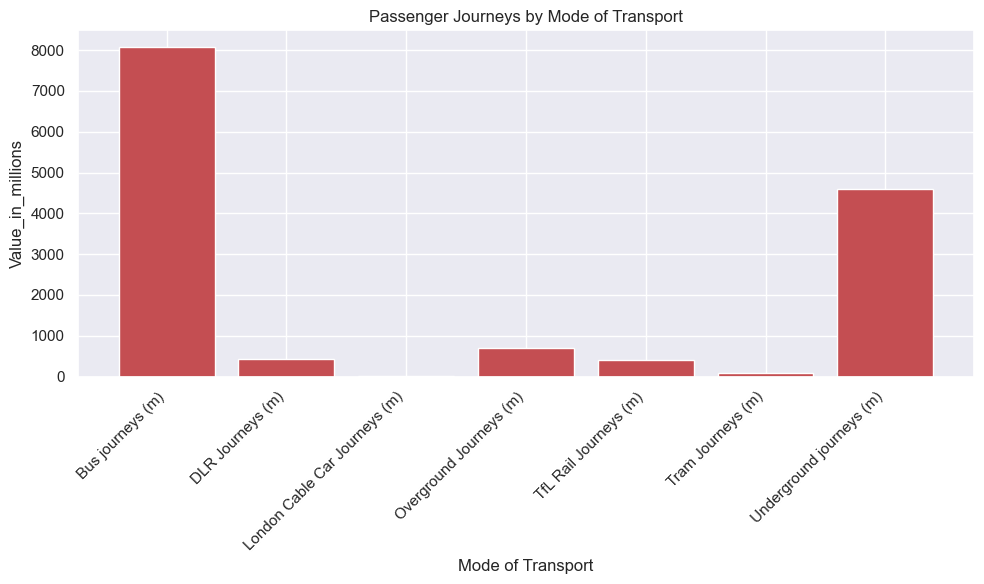

In [68]:
# Group by 'Age Range' and calculate the sum of 'VALUE_x' for each group
number_passenger_group_london = Type_of_Transport_london_melt.groupby('Mode of Transport')['Value_in_millions'].sum().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(number_passenger_group_london['Mode of Transport'], number_passenger_group_london['Value_in_millions'], color='r')
plt.xlabel('Mode of Transport')
plt.ylabel('Value_in_millions')
plt.title('Passenger Journeys by Mode of Transport')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

# Outliers

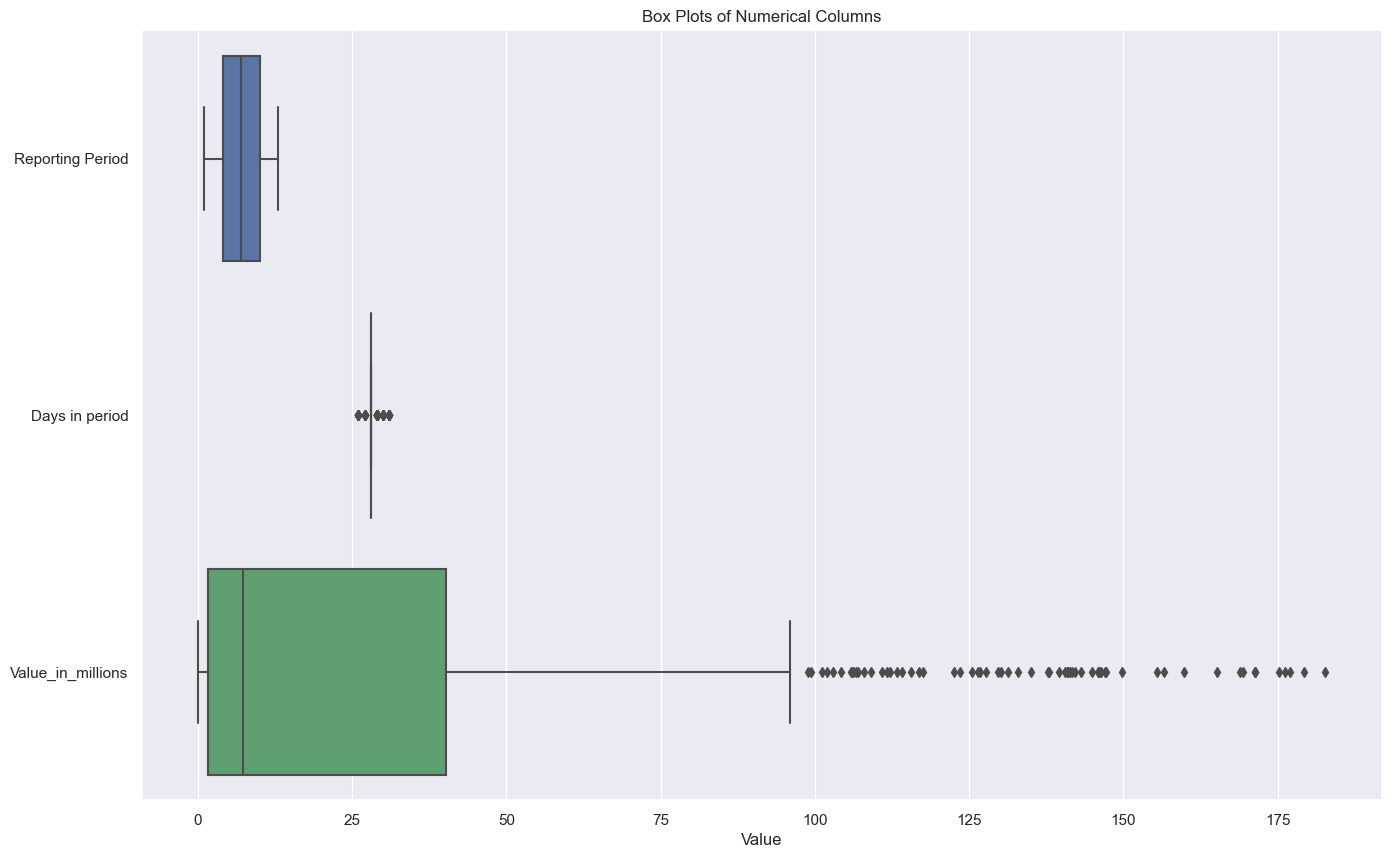

In [69]:
# Select only numerical columns from the DataFrame
numerical_columns = Type_of_Transport_london_melt.select_dtypes(include='number')

# Create box plots for each numerical column
plt.figure(figsize=(16, 10))
sns.boxplot(data=numerical_columns, orient='h')
plt.title('Box Plots of Numerical Columns')
plt.xlabel('Value')
plt.show()

# Encoding Categorical Variables

In [70]:
Data_num = Type_of_Transport_london_melt[['Year','Reporting Period','Days in period', 'Period beginning' , 'Period ending','Value_in_millions']]
Data_num

,Year,Reporting Period,Days in period,Period beginning,Period ending,Value_in_millions
0,2019,10,28,2018-12-09,2019-01-05,144.9
1,2019,11,28,2019-01-06,2019-02-02,171.3
2,2019,12,28,2019-02-03,2019-03-02,171.3
3,2019,13,29,2019-03-03,2019-03-31,182.7
4,2019,1,28,2019-04-01,2019-04-27,156.6
...,...,...,...,...,...,...
443,2023,4,28,2023-06-25,2023-07-22,16.7
444,2023,5,28,2023-07-23,2023-08-19,15.4
445,2023,6,28,2023-08-20,2023-09-16,15.6
446,2023,7,28,2023-09-17,2023-10-14,17.3


In [71]:
le = LabelEncoder()
Type_of_Transport_london_melt['Mode of Transport'] = le.fit_transform(Type_of_Transport_london_melt['Mode of Transport'])

In [72]:
#create new dataframe to merge new encoding dataframes
Type_of_Transport_london_melt = pd.merge(Type_of_Transport_london_melt['Mode of Transport'], Data_num, left_index=True, right_index=True, suffixes=("_l", "_r"))
Type_of_Transport_london_melt.head()

,Mode of Transport,Year,Reporting Period,Days in period,Period beginning,Period ending,Value_in_millions
0,0,2019,10,28,2018-12-09,2019-01-05,144.9
1,0,2019,11,28,2019-01-06,2019-02-02,171.3
2,0,2019,12,28,2019-02-03,2019-03-02,171.3
3,0,2019,13,29,2019-03-03,2019-03-31,182.7
4,0,2019,1,28,2019-04-01,2019-04-27,156.6


# Supervised Modelling 

In [73]:
# Select features and target variable
X = Type_of_Transport_london_melt[['Mode of Transport','Year','Reporting Period','Days in period']]
y = Type_of_Transport_london_melt['Value_in_millions']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lineal Regression model
linear_regressor = LinearRegression()
lasso_regressor = Lasso(alpha=0.1)
ridge_regressor = Ridge(alpha=1.0)

# Non-lineal Regression model
rf_regressor = RandomForestRegressor(random_state=42)
svr_regressor = SVR()
knn_regressor = KNeighborsRegressor()
gb_regressor = GradientBoostingRegressor()

Lineal_Regression_models = [linear_regressor, lasso_regressor, ridge_regressor]
Non_Lineal_Regression_models = [rf_regressor, svr_regressor, knn_regressor, gb_regressor]

# Lineal Regression models
for model in Lineal_Regression_models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'Linear Regression Model: {type(model).__name__}')
    print(f'Mean Squared Error: {mse}')
    print(f"R-squared (R2) Score: {r2}")
    print('\n')

# Non-Lineal Regression models
for model in Non_Lineal_Regression_models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'Non-Linear Regression Model: {type(model).__name__}')
    print(f'Mean Squared Error: {mse}')
    print(f"R-squared (R2) Score: {r2}")
    print('\n')


Linear Regression Model: LinearRegression
Mean Squared Error: 2690.013697984456
R-squared (R2) Score: -0.005086570760893805


Linear Regression Model: Lasso
Mean Squared Error: 2686.6531204163584
R-squared (R2) Score: -0.003830937235225873


Linear Regression Model: Ridge
Mean Squared Error: 2689.9105498223325
R-squared (R2) Score: -0.005048030870696607


Non-Linear Regression Model: RandomForestRegressor
Mean Squared Error: 259.5659528000003
R-squared (R2) Score: 0.9030167565386339


Non-Linear Regression Model: SVR
Mean Squared Error: 3769.8086996146185
R-squared (R2) Score: -0.40853710193342496


Non-Linear Regression Model: KNeighborsRegressor
Mean Squared Error: 1173.519991111111
R-squared (R2) Score: 0.5615304173101513


Non-Linear Regression Model: GradientBoostingRegressor
Mean Squared Error: 233.2406805189056
R-squared (R2) Score: 0.9128528319687246




In [74]:
from tabulate import tabulate

# Initialize variables to store results
results_table = []

# Lineal Regression models
for model in Lineal_Regression_models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results_table.append([type(model).__name__, mse, r2, 'Lineal'])

# Non-Lineal Regression models
for model in Non_Lineal_Regression_models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results_table.append([type(model).__name__, mse, r2, 'Non-Lineal'])

# Print the table
headers = ["Model", "Mean Squared Error", "R-squared (R2) Score", "Type of model"]
print(tabulate(results_table, headers=headers, tablefmt="grid"))

+---------------------------+----------------------+------------------------+-----------------+
| Model                     |   Mean Squared Error |   R-squared (R2) Score | Type of model   |
+===========================+======================+========================+=================+
| LinearRegression          |             2690.01  |            -0.00508657 | Lineal          |
+---------------------------+----------------------+------------------------+-----------------+
| Lasso                     |             2686.65  |            -0.00383094 | Lineal          |
+---------------------------+----------------------+------------------------+-----------------+
| Ridge                     |             2689.91  |            -0.00504803 | Lineal          |
+---------------------------+----------------------+------------------------+-----------------+
| RandomForestRegressor     |              259.566 |             0.903017   | Non-Lineal      |
+---------------------------+-----------

In [75]:
models = [linear_regressor, lasso_regressor, ridge_regressor, rf_regressor, svr_regressor, knn_regressor, gb_regressor]

# Initialize variables to store the top three models
top_models_mse = [(None, float('inf'))] * 3  # List of (model, mse)
top_models_r2 = [(None, -float('inf'))] * 3  # List of (model, r2)

# Iterate through models and evaluate
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Update top models based on MSE
    top_models_mse.append((model, mse))
    top_models_mse.sort(key=lambda x: x[1])  # Sort by MSE and keep top 3
    top_models_mse = top_models_mse[:2]

    # Update top models based on R2 score
    top_models_r2.append((model, r2))
    top_models_r2.sort(key=lambda x: x[1], reverse=True)  # Sort by R2 score and keep top 3
    top_models_r2 = top_models_r2[:2]

# Print the top three models based on MSE
print('\nTop 2 Best Models based on Mean Squared Error:')
for i, (model, mse) in enumerate(top_models_mse, 1):
    print(f'{i}. Model: {type(model).__name__}, MSE: {mse}')

# Print the top three models based on R2 score
print('\nTop 2 Best Models based on R-squared (R2) Score:')
for i, (model, r2) in enumerate(top_models_r2, 1):
    print(f'{i}. Model: {type(model).__name__}, R2 Score: {r2}')


Top 2 Best Models based on Mean Squared Error:
1. Model: GradientBoostingRegressor, MSE: 233.61829706350278
2. Model: RandomForestRegressor, MSE: 259.5659528000003

Top 2 Best Models based on R-squared (R2) Score:
1. Model: GradientBoostingRegressor, R2 Score: 0.9127117407474582
2. Model: RandomForestRegressor, R2 Score: 0.9030167565386339


## Model 1: Random Forest Regressor

Generation Random forest regression model and selecting hyperparameters using GridSearchCV 

In [76]:
# Select features and target variable
X = Type_of_Transport_london_melt[['Mode of Transport','Year','Reporting Period','Days in period']]
y = Type_of_Transport_london_melt['Value_in_millions']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)#, max_depth= 10, min_samples_leaf = 1, n_estimators= 200)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_leaf': [1, 5, 10]

}

# Create GridSearchCV object
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Initialize the Random Forest Regressor with the best hyperparameters
best_rf_model = RandomForestRegressor(**best_params)

# Fit the model to the training data
best_rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf_model = best_rf_model.predict(X_test)

# Evaluate the model
mse_rf_best = mean_squared_error(y_test, y_pred_rf_model)
r2_rf_best = r2_score(y_test, y_pred_rf_model)

print(f'Best Hyperparameters: {best_params}')
print(f'Mean Squared Error (Random Forest - Best): {mse_rf_best}')
print(f"R-squared (R2) Score (Random Forest - Best): {r2_rf_best}")



Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'n_estimators': 50}
Mean Squared Error (Random Forest - Best): 278.6723482871055
R-squared (R2) Score (Random Forest - Best): 0.8958779150025761


### Features importance

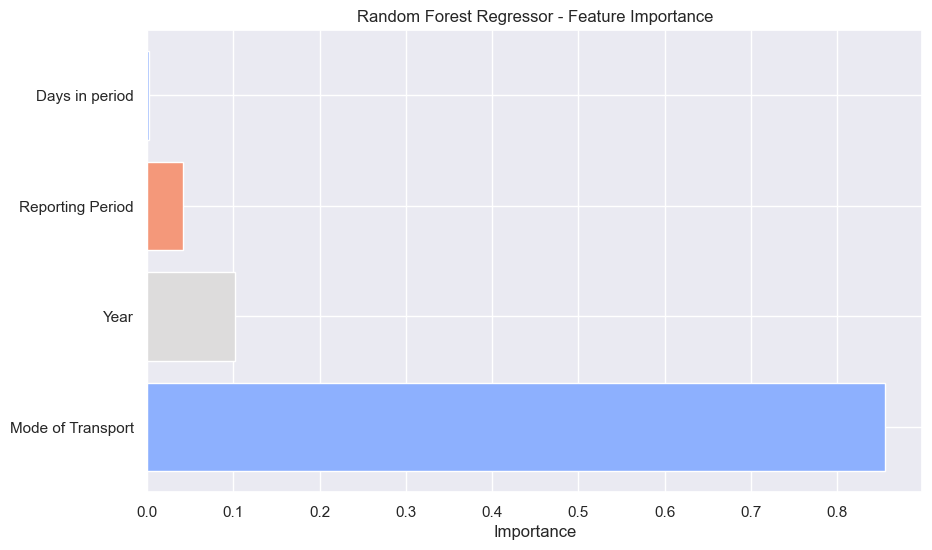

In [77]:

# Fit the model to the entire dataset
rf_model.fit(X, y)

# Extract feature importances
feature_importance = rf_model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Create a custom color palette
colors_gb = sns.color_palette('coolwarm', n_colors=len(feature_importance_df_gb))

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color=colors_gb) 
plt.xlabel('Importance')
plt.title('Random Forest Regressor - Feature Importance')
plt.show()


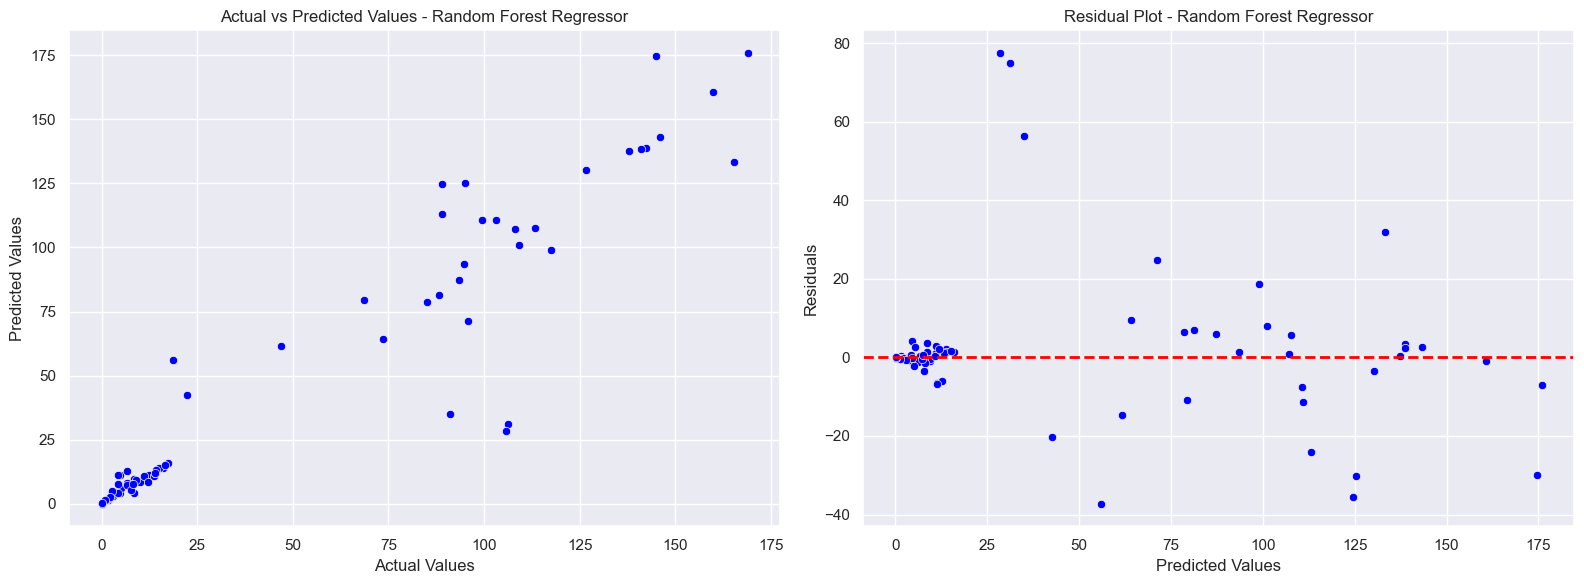

In [78]:
# Scatter plot and Residual plot in a single plot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Scatter plot of actual vs predicted values
sns.scatterplot(x=y_test, y=y_pred_rf, color='blue', ax=axes[0])
axes[0].set_title('Actual vs Predicted Values - Random Forest Regressor')
axes[0].set_xlabel('Actual Values')
axes[0].set_ylabel('Predicted Values')
axes[0].grid(True)

# Residual plot
sns.scatterplot(x=y_pred_rf, y=y_test - y_pred_rf, color='blue', ax=axes[1])
axes[1].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[1].set_title('Residual Plot - Random Forest Regressor')
axes[1].set_xlabel('Predicted Values')
axes[1].set_ylabel('Residuals')
axes[1].grid(True)

plt.tight_layout()
plt.show()

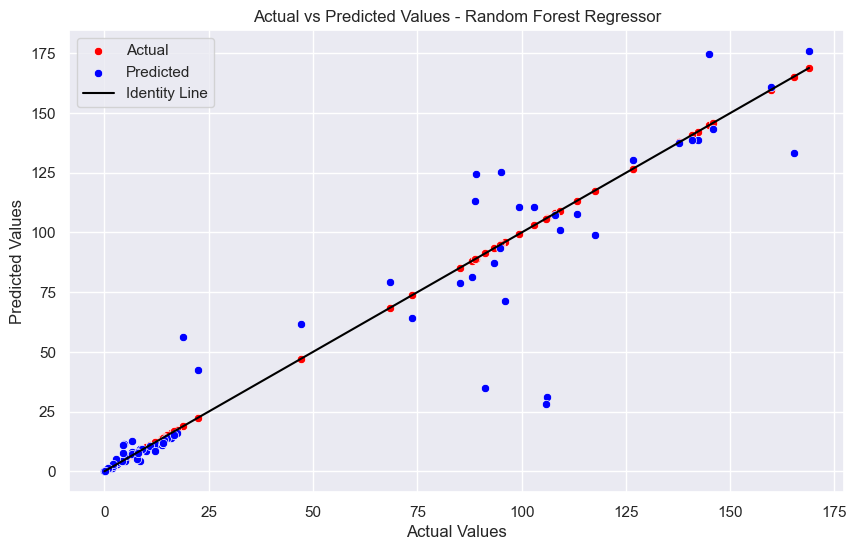

In [79]:
# Create a DataFrame to store actual and predicted values
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf})

# Scatter plot with different colors for actual and predicted values
plt.figure(figsize=(10, 6))

# Plot actual values in red
sns.scatterplot(x='Actual', y='Actual', data=results_df, color='red', label='Actual')

# Plot predicted values in blue
sns.scatterplot(x='Actual', y='Predicted', data=results_df, color='blue', label='Predicted')

# Add a line representing the identity line
plt.plot([results_df['Actual'].min(), results_df['Actual'].max()],
         [results_df['Actual'].min(), results_df['Actual'].max()],
         linestyle='-', color='black', label='Identity Line')

plt.title('Actual vs Predicted Values - Random Forest Regressor')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()


## Model 2: Gradient Boosting Regressor

In [80]:
# Assuming 'X' is your feature matrix and 'y' is your target variable
X = Type_of_Transport_london_melt[['Mode of Transport','Year','Reporting Period','Days in period']]
y = Type_of_Transport_london_melt['Value_in_millions']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(learning_rate=0.5, max_depth= 4, n_estimators= 200)

# Define the hyperparameters and their possible values for GridSearch
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2, 0.5],
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [3, 4, 5, 6]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=gb_regressor, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Initialize the Gradient Boosting Regressor with the best hyperparameters
best_gb_regressor = GradientBoostingRegressor(**best_params)

# Fit the model to the training data
best_gb_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gb_best = best_gb_regressor.predict(X_test)

# Evaluate the model
mse_gb_best = mean_squared_error(y_test, y_pred_gb_best)
r2_gb_best = r2_score(y_test, y_pred_gb_best)

print(f'Best Hyperparameters: {best_params}')
print(f'Mean Squared Error (Gradient Boosting - Best): {mse_gb_best}')
print(f"R-squared (R2) Score (Gradient Boosting - Best): {r2_gb_best}")

Best Hyperparameters: {'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 200}
Mean Squared Error (Gradient Boosting - Best): 263.40406642766754
R-squared (R2) Score (Gradient Boosting - Best): 0.9015826982410449


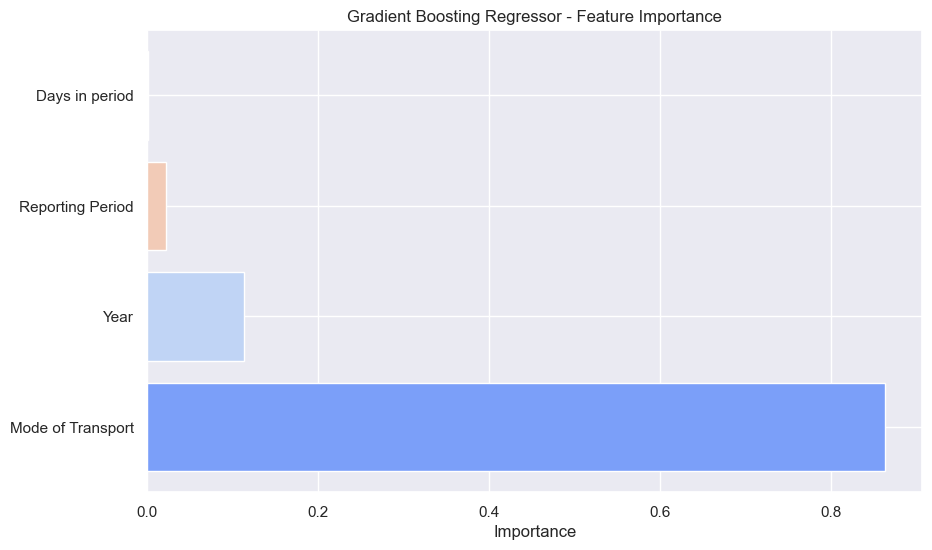

In [81]:
# Select features and target variable
X = Type_of_Transport_london_melt[['Mode of Transport','Year','Reporting Period','Days in period']]
y = Type_of_Transport_london_melt['Value_in_millions']

# Fit the model to your data
gb_regressor.fit(X, y)

# Extract feature importances
feature_importance_gb = gb_regressor.feature_importances_

# Create a DataFrame to store feature importances
feature_importance_df_gb = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance_gb})

# Sort the DataFrame by importance in descending order
feature_importance_df_gb = feature_importance_df_gb.sort_values(by='Importance', ascending=False)

# Create a custom color palette
colors_gb = sns.color_palette('coolwarm', n_colors=len(feature_importance_df_gb))

# Plot feature importances with mixed colors
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df_gb['Feature'], feature_importance_df_gb['Importance'], color=colors_gb)

plt.xlabel('Importance')
plt.title('Gradient Boosting Regressor - Feature Importance')
plt.show()

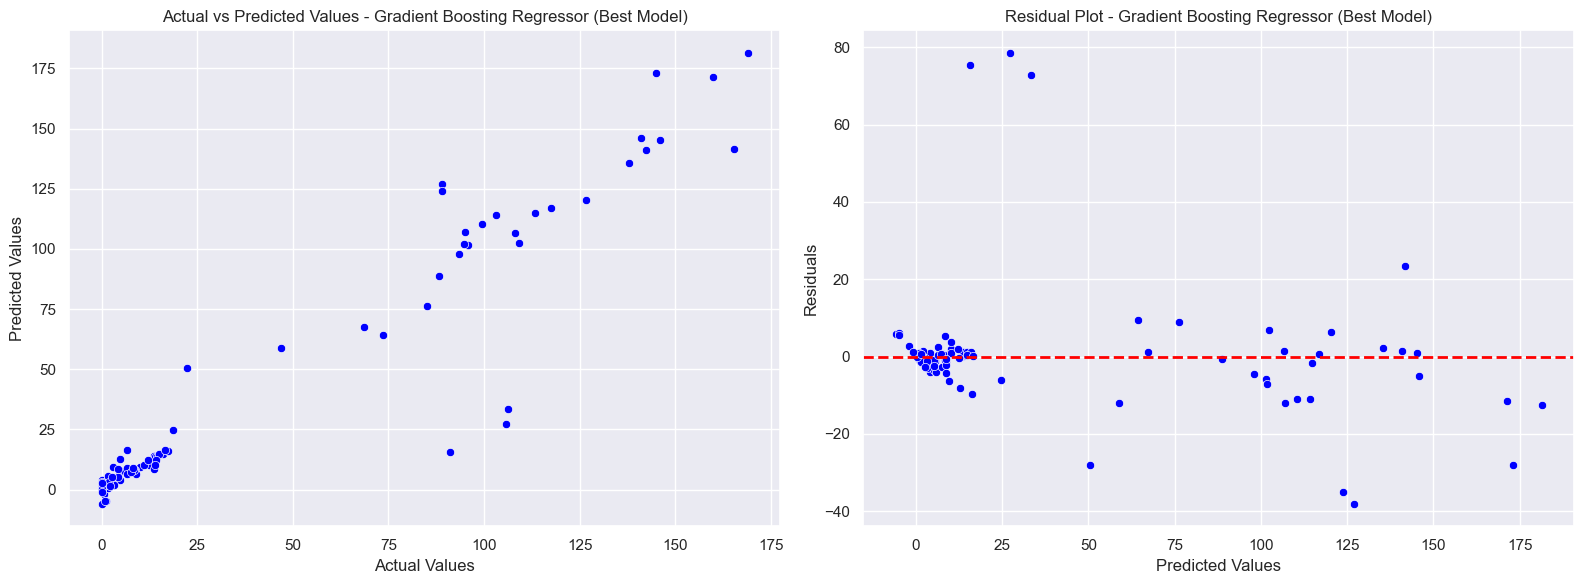

In [85]:
# Scatter plot and Residual plot in a single plot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Scatter plot of actual vs predicted values
sns.scatterplot(x=y_test, y=y_pred_gb_best, color='blue', ax=axes[0])
axes[0].set_title('Actual vs Predicted Values - Gradient Boosting Regressor (Best Model)')
axes[0].set_xlabel('Actual Values')
axes[0].set_ylabel('Predicted Values')
axes[0].grid(True)

# Residual plot
sns.scatterplot(x=y_pred_gb_best, y=y_test - y_pred_gb_best, color='blue', ax=axes[1])
axes[1].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[1].set_title('Residual Plot - Gradient Boosting Regressor (Best Model)')
axes[1].set_xlabel('Predicted Values')
axes[1].set_ylabel('Residuals')
axes[1].grid(True)

plt.tight_layout()
plt.show()

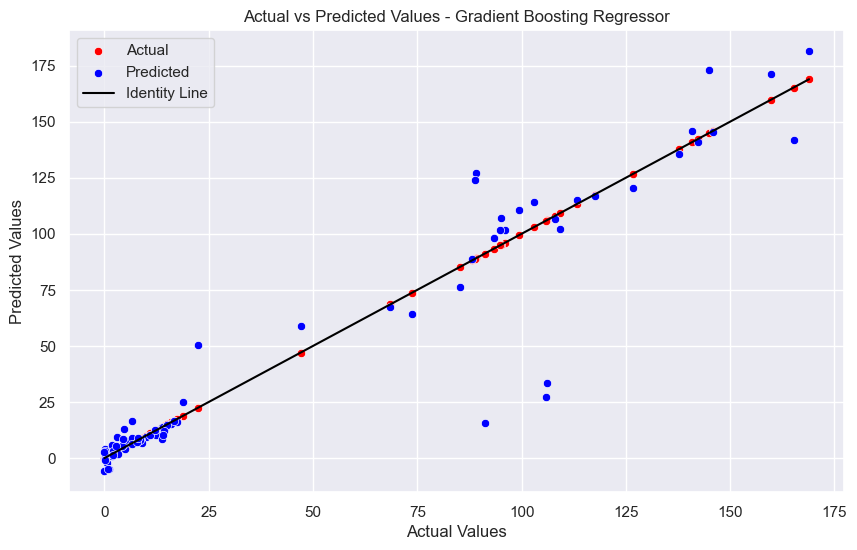

In [88]:
# Create a DataFrame to store actual and predicted values
results_df_gb = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_gb_best})

# Scatter plot with different colors for actual and predicted values
plt.figure(figsize=(10, 6))

# Plot actual values in red
sns.scatterplot(x='Actual', y='Actual', data=results_df_gb, color='red', label='Actual')

# Plot predicted values in blue
sns.scatterplot(x='Actual', y='Predicted', data=results_df_gb, color='blue', label='Predicted')

# Add a line representing the identity line
plt.plot([results_df_gb['Actual'].min(), results_df_gb['Actual'].max()],
         [results_df_gb['Actual'].min(), results_df_gb['Actual'].max()],
         linestyle='-', color='black', label='Identity Line')

plt.title('Actual vs Predicted Values - Gradient Boosting Regressor')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()